# Introduction

April 15th, 1912 marks the date of one of the deadliest, and probably the most well known, maritime disasters in history - the sinking of the RMS Titanic. Departing from Southampton and on the way to New York City, crossing the Atlantnic Ocean, the ship collided with an iceberg four days into it's journey. With over 2,200 people on-board, a limited number of rescue boats, fatally cold waters, and poor management of the evacuation each played a role in the disaster's high count of fatalies, estimated to be between 1,490 and 1,635 deaths. 710 people were saved.

With this dataset from Kaggle, we'll analyze what we know about the individual passengers who were on the Titanic in order to discover what were the indicators of survival.

# Reading Data into Pandas

Let's first read our Titanic csv into a Pandas DataFrame, and then using .head() to make sure it worked and to get a feel of th data.

In [1]:
import pandas as pd
from pandas import Series,DataFrame

titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Wrangling

Using .info() on the data will give us a nice overview and an idea of what we're working with in terms of size and types of information provided.

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We see that some columns are missing information: Only 204 of the 891 rows of data have Cabin information, 714 have age data, and 2 rows are missing information on where the passengers embarked from. 


As 'Cabin' is missing a substantial amount of information, we don't believe it'll be particularly useful for analysis purposes. Thus, we will remove this column from our dataset. 

In [3]:
del titanic_df['Cabin']

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We've removed the 'Cabin' column from our dataset.

How we'll deal with the missing values in the Embarked and Age columns moving forward:

    1. Keep them as is. 
    2. The visualization tools from matplotlib and seaborn that we'll be using extensively through out this project ignore missing values when creating graphs. So missing values should be not be an issue in this regard.


 Now we can think about questions we'd like to answer as we explore this dataset.

# Investigative Questions

We're going to approach this dataset by first doing analysis on the passengers themselves. Here are the questions we'll ask as we explore the data:

    1. What do we know about these passengers? Let's break down the passengers by gender, age, class, etc. to have a clearer picture of who were the people on the RMS Titanic.

    2. What is the distribution of cities passengers were embarking from?

    3. Who traveled on their own? Who traveled with family - either a spouse, sibling, parent, and/or child?

Once we've painted a picture of the passengers, we'll then investigate the main question of this project:

    4. What factors correlated with survival of the Titanic's sinking? 


# Passenger Breakdown by Gender, Age, and Class

Let's tackle the first question - what do we know about these passengers? First we'll import the packages we'll need for our analysis and to visualization our insights. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll begin with looking at a gender breakdown through a countplot.

In [6]:
# Function to add values on top of bars in countplots
def annotate_bar(ax):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., 1*p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

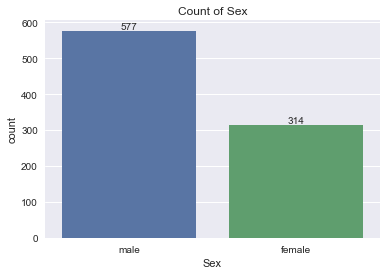

In [7]:
ax = sns.countplot(x = 'Sex', data=titanic_df)
annotate_bar(ax)
sns.plt.title('Count of Sex')

We see there's a lot more men than women - 577 to 314. How would this look if we broke it down by class?

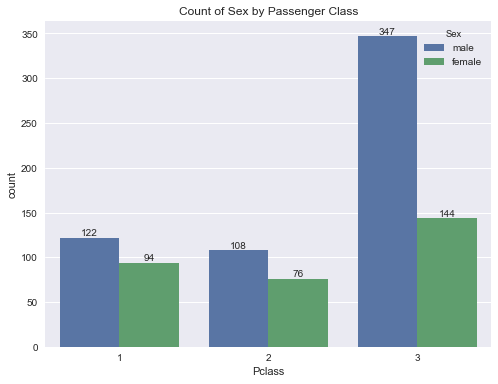

In [8]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x = 'Pclass', data=titanic_df, hue = 'Sex')
annotate_bar(ax)
sns.plt.title('Count of Sex by Passenger Class')

So we see here that while the first two classes are almost equal in their distribution of men to female (but still leaning towards men), the 3rd class has substantially much more men than female, and clearly have a majority of the passengers. 

However, there must be children on the ship as well. As the "Women and Children First" policy (the policy of giving women and children priority to be saved in a life-threatning situation) supposedly had an impact on survival rates, we should breakdown the data to take children into account in order to see the impact ourselves. Let's create a new column that splits the passengers by male, female, and child (under 16).

In [9]:
def check_age(passenger):
    age,sex = passenger 
    if age < 16: 
        return 'child'
    else:
        return sex


titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(check_age,axis=1)

Let's see if it worked by using .head() on the dataset. I'll take a look at the first 10 rows.

In [10]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child


Great - in the first 10 rows we see passengers labeled as male, female, and child in the 'person' column.

Using .value-counts() on the column will quickly tell us the number of male, female, and children passengers.

In [11]:
print(titanic_df['person'].value_counts())

male      537
female    271
child      83
Name: person, dtype: int64


Now let's do again do a breakdown across the three classes but with children taken into account.

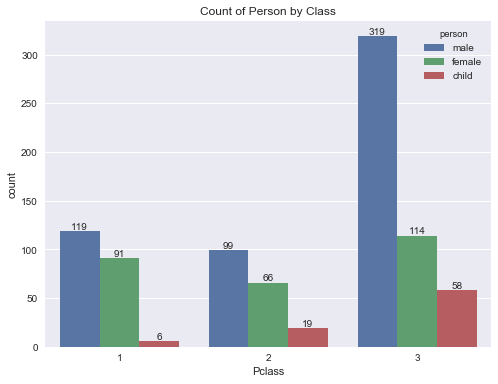

In [12]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x = 'Pclass', data=titanic_df, hue = 'person')
annotate_bar(ax)
sns.plt.title('Count of Person by Class')

It appears the 3rd class had a majority of the children with 58, while the 1st class only had 6.  

Since we've entered the discussion of age by analyzing the number of children, let's go a step further and create a distribution of the passengers' ages. 

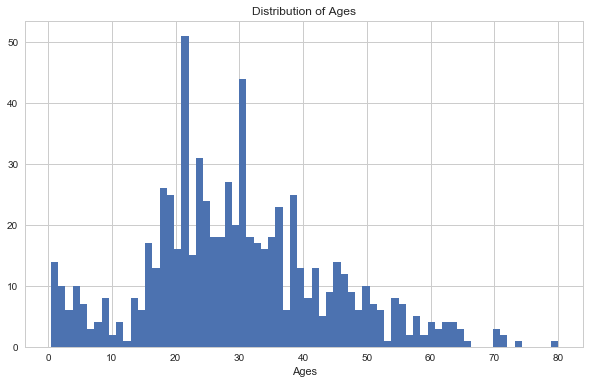

In [33]:
plt.figure(figsize=(10,6))
titanic_df['Age'].hist(bins=70)
sns.plt.title('Distribution of Ages')
plt.xlabel('Ages')

This histogram shows us that a majority of the passengers were late teens to about middle-aged (mid-30s), with distribution dropping off for children and adults older than 40.

Let's use kdeplots to compare the distribution shapes of ages across Sex and Class. 

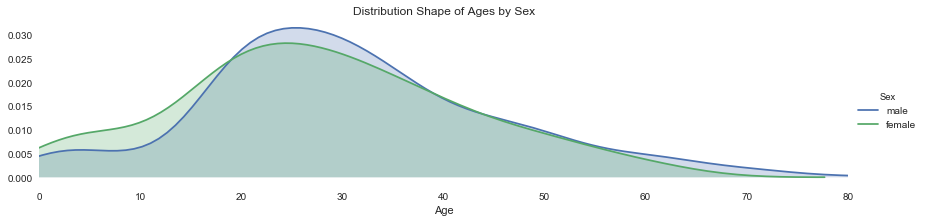

In [14]:
sns.set_style("whitegrid", {'axes.grid' : False})
kdesex = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
kdesex = kdesex.map(sns.kdeplot, 'Age', shade=True).add_legend()
kdesex.set(xlim=(0, titanic_df['Age'].max()))
sns.despine(left=True, bottom=True)
sns.plt.title('Distribution Shape of Ages by Sex')

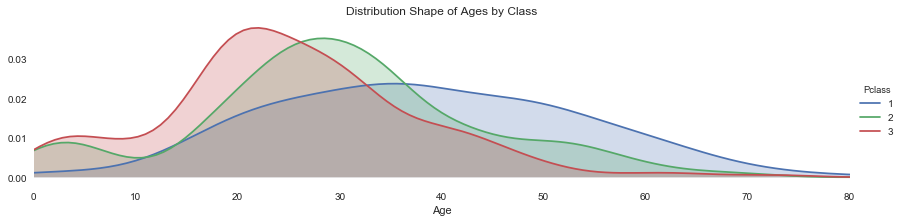

In [15]:
sns.set_style("whitegrid", {'axes.grid' : False})
kdesex = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)
kdesex = kdesex.map(sns.kdeplot, 'Age', shade=True).add_legend()
kdesex.set(xlim=(0, titanic_df['Age'].max()))
sns.despine(left=True, bottom=True)
sns.plt.title('Distribution Shape of Ages by Class')

The first plot shows a fairly similar distribution of ages between Male and Female.

The second kdeplot for the Class is a bit more interesting. The 2nd and 3rd classes are relatively positively skewed, which indicates their passengers were more on the younger side. The 1st class on the other hand is more normally distributed, with no clear bias for a certain age-range.

Now that we've developed a clearer picture of who these passengers were, we can now move on to our next question: Where did these passengers come from?

# Departure Cities

Let's take a look at the cities these passengers came from.

In [16]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We know from the Kaggle page for the data that theses abbreviations stand for Southampton in the UK, Cherbourg in France, and Queenstown in Ireland. It would be preferable if we could see the city names when analyzing our data, so let's change that.

In [17]:
titanic_df['Embarked'] = titanic_df['Embarked'].replace({'S':'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

Now can we make a countplot to get a sense of where passengers across the three classes came from. 

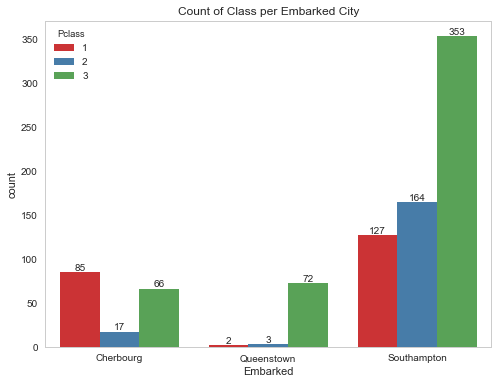

In [18]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'Embarked', data = titanic_df.sort_values(by='Embarked'), hue = 'Pclass', palette='Set1')
annotate_bar(ax)
sns.plt.title('Count of Class per Embarked City')

Main observations:
    
    1. Southampton is the point of origin for most of the passengers, regardless of class
    2. Queenstown's passengers are almost exclusively 3rd class passengers. Does this indicate Queenstown consisted of mainly people of a lower economic status?
    3. Charbourg is the only town of the three with more 1st class passengers than the other two classes. Would be interesting to look into Charbourg's history and to determine if it was an affluent part of France.

Let's now tackle our 3rd question: How many people were traveling alone, and how many traveled with family?

# Traveling Alone or With Family

In order to figure out whether someone was traveling alone or with family, we'll need to create a new column - let's call it 'Alone' - that adds up the values in the 'SibSp' and 'Parch' columns. For clarification, the 'SibSp' column tells us whether the passenger was traveling with either siblings and/or a spouse. The 'Parch' tells us whether the passenger was travelling with either parents and/or children. The higher the number, the more siblings/spousers and parents/children they were travelling with. 


In [19]:
Alone = titanic_df['SibSp'] + titanic_df['Parch']
Alone

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
dtype: int64

It looks like our new column worked. After adding them up, we can immediately know if the passenger was traveling with anyone. If the value is 0, then they were alone. Otherwise, they traveled with a family member. Let's create and apply a function on the Column that converts all 0 values to 'Alone', and everything else to 'With Family'.


In [20]:
def check_fam(alonen):
    if alonen > 0:
        return 'With Family'
    else:
        return 'Alone'

titanic_df['Alone'] = Alone.apply(check_fam)

Let's use .head() to make sure it worked.

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,male,Alone


It appears it has. Let's now create a countplot to finally see how many people traveled alone and with family, across male, female, and children, and also across class.

In [22]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

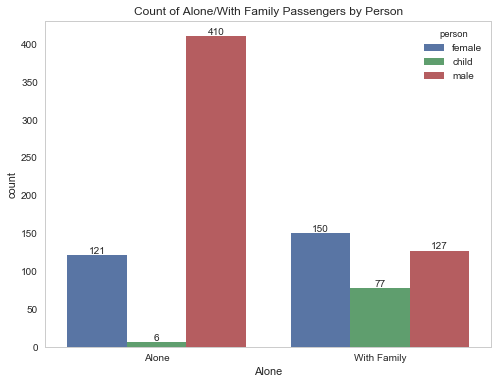

In [23]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'Alone', data = titanic_df.sort_values(by='Embarked'), hue='person')
annotate_bar(ax)
sns.plt.title('Count of Alone/With Family Passengers by Person')

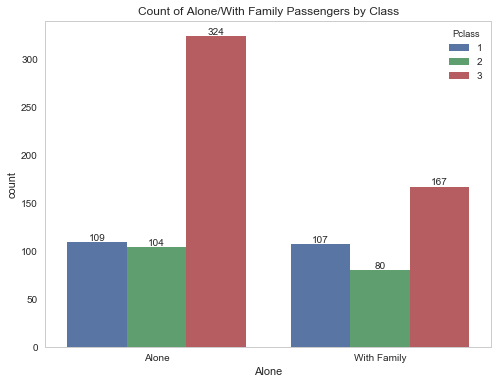

In [24]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'Alone', data = titanic_df.sort_values(by='Embarked'), hue='Pclass')
annotate_bar(ax)
sns.plt.title('Count of Alone/With Family Passengers by Class')

Several findings to take note of:

    1. While more women and children traveled with family than alone, substantially (283) more men traveled alone than they  did with family. This could likely represent the many young men who left Europe to the US to look for work.
    2. Six children traveled alone. Potentially teenagers leaving for work themselves?
    3. With the second plot for the Class, it appears the distribution of passengers who traveled  alone or with family is almost equal (but leaning towards Alone) for the 1st and 2nd classes. The 3rd class on the other hand is predominately  passengers traveling alone. Considering the countplot before, this is likely due to the amount of men traveling alone. 
    

    

With these findings and understanding of the make-up of passengers on the Titanic, we can now tackle our main question: What factors correlated with survival?

# Indicators of Survival

In order to answer this question, what we'll do is create a variety of point plots and lmplots to visualization the relationship between survival and the following indicators:
    1. Class
    2. Age
    3. Traveling alone or with family
  
We'll begin by first counting the number of people who survived and those who didn't. 

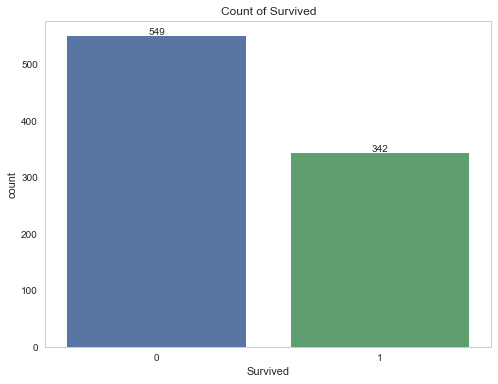

In [25]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x = 'Survived', data = titanic_df)
annotate_bar(ax)
sns.plt.title('Count of Survived')

The plot above shows that more than 200 people died than survived (549 vs. 342). Let's see if one's class had an effect on their chances of survival. 

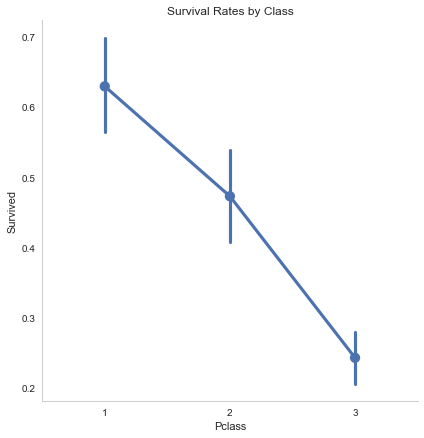

In [26]:
sns.factorplot(x='Pclass', y='Survived', data=titanic_df, size=6)
#The points are the means and the lines are the confidence intervals
sns.plt.title('Survival Rates by Class')

So it looks like chances of survival goes down along with class. But let's throw in the 'person' column as an extra detail to see how much class survival rates change between men, women, and children. 

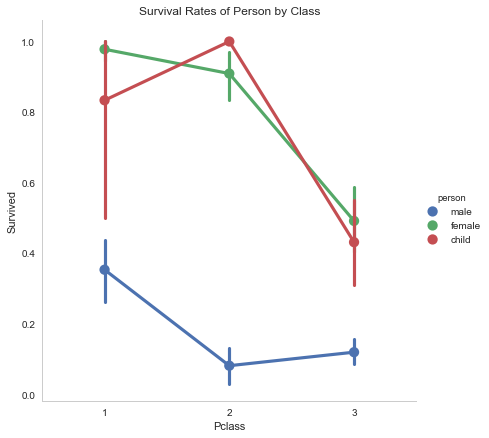

In [27]:
sns.factorplot(x='Pclass', y='Survived', data=titanic_df, size=6, hue ='person')
sns.plt.title('Survival Rates of Person by Class')

This gives us a clearer picture than the point plot before. 

    1. While survival rates for 3rd class are clearly low, we see here that the average survival rate gets close to .50 for women and children - but still very low for men (less than .20). 
    2. Actually, it appears across all classes, survival rates for men are less than .50. 
    3. While women and children have better survival rates than men, it's in the 1st and 2nd classes in particular where their rates start to closely approach 1.0. 
    4. Women and children's higher chances of survival than men is consistent with the 'Women and Children First' policy disc

Did age have any affect on survival? Let's use an lmplot to see their relationship.

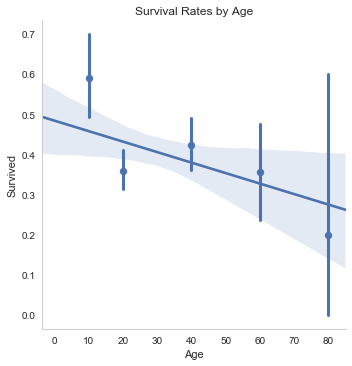

In [28]:
ages=[10,20,40,60,80]
sns.lmplot(x='Age', y='Survived', data=titanic_df, x_bins=ages)
sns.plt.title('Survival Rates by Age')

It appears there's a general trend between age and survival. The main insight from this plot is that chances of survival decreases when the passenger's age increases. Additionally, considering the policy of 'Women and Children First', it makes sense survival rates start off higher as most of the children in the first two classes survived. 

Let's see if this relationship between age and survival is consistent across the three classes.

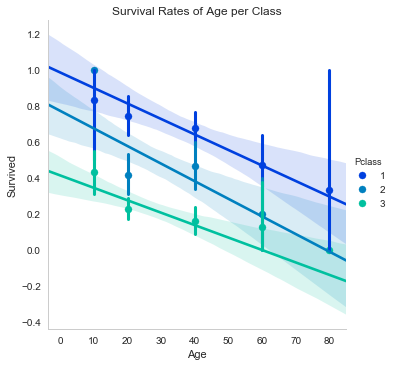

In [29]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins = ages) 
sns.plt.title('Survival Rates of Age per Class')

It looks the relationship is indeed consistent across all three classes. 

Now let's visualize the relationship between gender and survival.

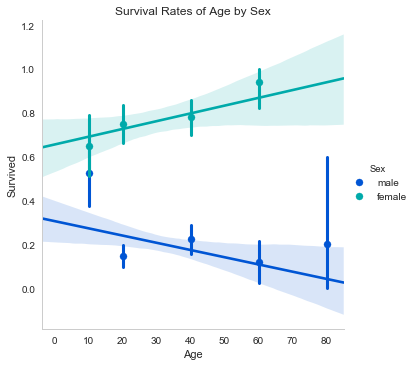

In [30]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Sex', palette='winter', x_bins=ages)
sns.plt.title('Survival Rates of Age by Sex')

Interesting - While the relationship between survival and age for men is consistent with what we've seen in the plots before, the relationship for women tells a different story. It appears chances of survival goes up with age. A theory for this is that older women received priority over younger women during evacuation of the Titanic.

Finally, let's look at one more indicator to compare with survival - whether a passenger traveled alone or with family.

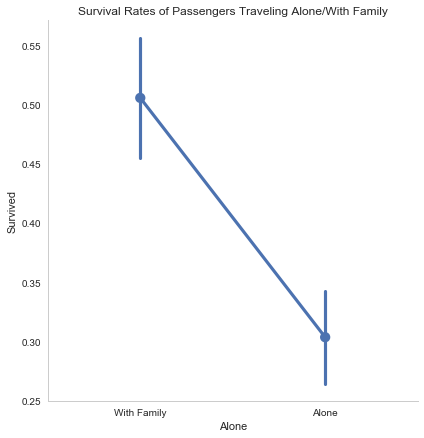

In [31]:
sns.factorplot(x='Alone', y='Survived', data=titanic_df, size=6)
sns.plt.title('Survival Rates of Passengers Traveling Alone/With Family')

The plot shows that traveling with a family member has a much higher rate of survival than traveling alone. However, considering the number of men who travel alone, and the fact men had low survival rates, it's possible that they're significantly impacting the survival rate for passengers who traveled alone. Let's see how this looks across men, women, and children.

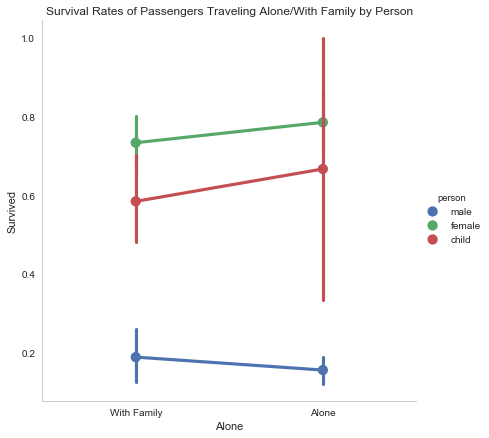

In [32]:
sns.factorplot(x='Alone', y='Survived', data=titanic_df, hue='person', size=6)
sns.plt.title('Survival Rates of Passengers Traveling Alone/With Family by Person')

With this plot, we see a different picture of the relationship. For women and children, it doesn't appear chances of survival goes done if they travel alone. If anything, it looks like there's a slight increase in chances of survival. It is unclear what would explain the slight bump. At least in the case of children, based on the countplot earlier, there is a much smaller sample size for those who traveled alone (6 vs 77). 

For men, chances go down when they travel alone, but not by much.

Unlike survival's relationship with age and class, there aren't substantial visual differences here to indicate that traveling alone or with family would have a strong effect on one's survival. 

# Conclusion

Going back to our main investigative question - What factors correlated with survival of the Titanic? - here are the key findings:

1. Gender: Men were less likely than women and children to survive. This is consistent with the 'Women and Children First' policy.
2. Gender: Women and children were almost equally likely to survive. 
    
3. Age: Generally, the older you are, the less likely you would survive, regardless of class. However, this doesn't hold up if you break down age by gender.
4. Age + Gender: For women, the older a passenger was, the more likely they would survive. It's possible older women get priority in the 'Women and Children First' policy. 
    
5. Class: What's clear is that regardless of gender, passengers in 3rd class were far less likely to survive than those in the other classes.  But if you break it down by 'person', two caveats stand out - for the 2nd class, every child survived, while men's chances of survival were lowest. 
    
6. Traveling alone or with family is the only indicator that doesn't clearly appear to have an affect on survival, as breaking it down by man, woman, and child doesn't show any visually significant increases or decreases in chances between the two categories. 

The main limitation to be kept in mind for this project is that there were over 2,000 people onboard the Titanic. This dataset did not include information on every single passenger on the ship. Thus, there's the possibility there are other valuable insights we're missing, or some insights here that could be inaccurate, due to the missing passenger information. 

------------------------------------------------

Sources:

1. http://matplotlib.org/examples/api/barchart_demo.html (to label bars with the values)